In [1]:
from qiskit import __version__

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile 
import numpy as np
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError
from qiskit.circuit.library import HGate, UnitaryGate

# Encoding Circuit for Steane Code

In [4]:
qc = QuantumCircuit(7)

theta = np.arctan(np.sqrt((np.sqrt(5) - 1) / 2))
amp_0 = np.cos(theta/2)
amp_1 = np.sin(theta/2)
print(f"amp0: {amp_0}")
print(f"amp1: {amp_1}")
print(f"amp0/sqrt(8): {amp_0/np.sqrt(8)}")
print(f"amp1/sqrt(8): {amp_1/np.sqrt(8)}")

amp0: 0.9450268191319819
amp1: 0.32699283038208704
amp0/sqrt(8): 0.33411743610568867
amp1/sqrt(8): 0.11560942388127812


## Using CX 

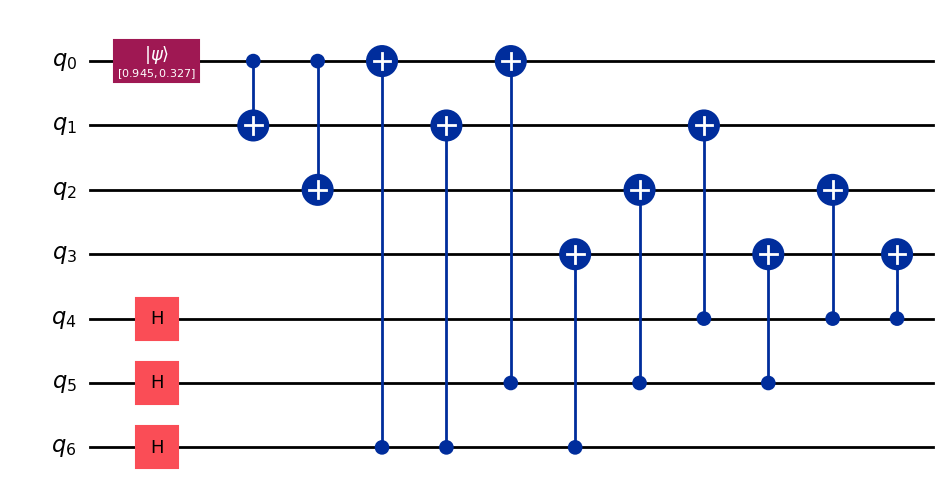

In [5]:
qc.initialize([amp_0, amp_1], 0)

for i in range(4, 7):
    qc.h(i)

qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(6, 0)
qc.cx(6, 1)
qc.cx(6, 3)
qc.cx(5, 0)
qc.cx(5, 2)
qc.cx(5, 3)
qc.cx(4, 1)
qc.cx(4, 2)
qc.cx(4, 3)

display(qc.draw(output='mpl'))

In [6]:
state = Statevector.from_instruction(qc)
display(state.draw("latex"))

<IPython.core.display.Latex object>

In [7]:
amplitude0 = amp_0 / np.sqrt(8)
amplitude1 = amp_1 / np.sqrt(8)
print("Amplitude for 0: ", amplitude0)
print("Amplitude for 1: ", amplitude1)

Amplitude for 0:  0.33411743610568867
Amplitude for 1:  0.11560942388127812


In [8]:
prob0 = abs(amp_0)**2 / 8
prob1 = abs(amp_1)**2 / 8
print("Prob 0: ", prob0)
print("Prob 1: ", prob1)

Prob 0:  0.11163446110983896
Prob 1:  0.013365538890161044


## Using CZ

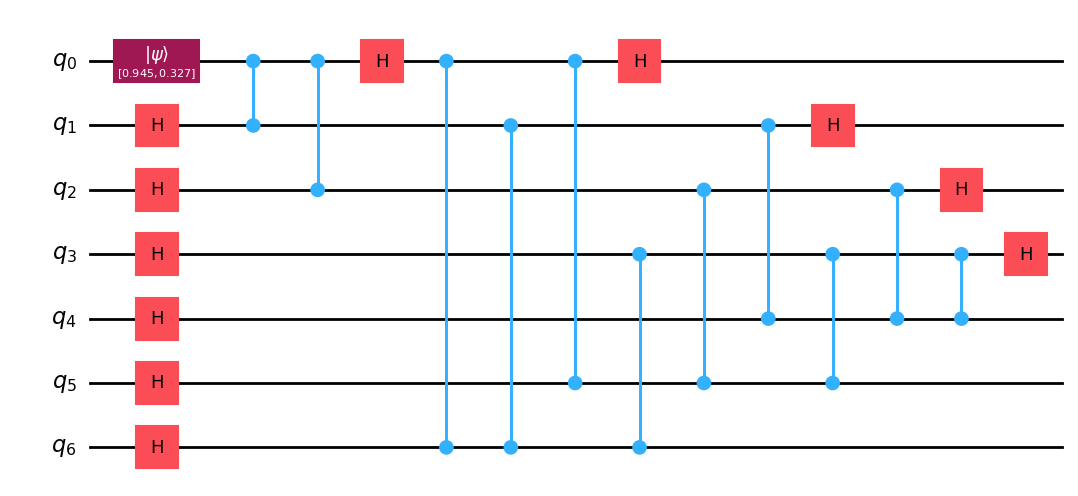

In [9]:
qc = QuantumCircuit(7)

qc.initialize([amp_0, amp_1], 0)
for i in range(1, 7):
    qc.h(i)
    
qc.cz(0, 1)
qc.cz(0, 2)
qc.h(0)
qc.cz(0, 6)
qc.cz(1, 6)
qc.cz(0, 5)
qc.cz(3, 6)
qc.cz(2, 5)
qc.cz(1, 4)
qc.cz(3, 5)
qc.cz(2, 4)
qc.cz(3, 4)

for i in range(4):
    qc.h(i)
    
display(qc.draw(output='mpl'))

In [10]:
state = Statevector.from_instruction(qc)
display(state.draw("latex"))

<IPython.core.display.Latex object>